> [Julia ZH](https://juliacn.gitlab.io/JuliaZH.jl/index.html)

## 第一章 非线性方程的数值解法


### 二分法

In [ ]:
using Printf
using Plots

In [ ]:
function BisectionMethod(f::Function, a, b, ϵ0)
    fa = f(a)
    fb = f(b)
    if a >= b || fa * fb > 0
        return NaN
    end
    n = floor(log2((b - a) / ϵ0))
    @printf("所需迭代轮数为: %4d\t\t\t\t精度要求: %16.12f\n", n, ϵ0)
    @printf("%4s%18s%18s%18s%18s%18s\n", "iter","x","a", "b","f(x)","ϵ")
    x_prev = a
    x = NaN
    for i = 0:n
        x = (a + b) / 2
        ϵ = abs(x_prev - x)
        y = f(x)
        @printf("%4d%18.12f%18.12f%18.12f%18.12f%18.12f\n", i, x, a, b, y, ϵ)
        if f(a) * y < 0
            b = x
        elseif y == 0
            a = b = x
        else 
            a = x
        end
        x_prev = x
    end
    return x
end


BisectionMethod (generic function with 1 method)

* 习题1.2，二分法求根

In [ ]:
f2(x) = x^3 -2x - 5
ϵ2 = 0.5e-3
println("x = $(BisectionMethod(f2,2,3,ϵ2))")

所需迭代轮数为:   10				精度要求:   0.000500000000
iter                 x                 a                 b              f(x)                 ϵ
   0    2.500000000000    2.000000000000    3.000000000000    5.625000000000    0.500000000000
   1    2.250000000000    2.000000000000    2.500000000000    1.890625000000    0.250000000000
   2    2.125000000000    2.000000000000    2.250000000000    0.345703125000    0.125000000000
   3    2.062500000000    2.000000000000    2.125000000000   -0.351318359375    0.062500000000
   4    2.093750000000    2.062500000000    2.125000000000   -0.008941650391    0.031250000000
   5    2.109375000000    2.093750000000    2.125000000000    0.166835784912    0.015625000000
   6    2.101562500000    2.093750000000    2.109375000000    0.078562259674    0.007812500000
   7    2.097656250000    2.093750000000    2.101562500000    0.034714281559    0.003906250000
   8    2.095703125000    2.093750000000    2.097656250000    0.012862332165    0.001953125000
   9    2.

### 单点迭代法

In [ ]:
function OnePointIterationMethod(ϕ::Function, x0, ϵ0)
    # 检查不收敛的情况
    x_prev = x0
    x = ϕ(x0)
    i = 0
    δ = abs(x-x_prev)
    @printf("%4s%18s%18s%18s\n", "iter","x_i+1", "x_i","ϵ")
    @printf("%4d%18.12f%18.12f%18.12f\n",i,x,x_prev,δ)
    i += 1
    while abs(x-x_prev) >= ϵ0 && i < 50
        x_prev = x
        x = ϕ(x_prev)
        δ = abs(x-x_prev)
        @printf("%4d%18.12f%18.12f%18.12f\n",i,x,x_prev,δ)
        i += 1
    end
    return x
end

OnePointIterationMethod (generic function with 1 method)

* 习题2.5，根据迭代公式求根

* 2.5.1, $x_{i+1} = 1 + \frac{1}{x_{i}^{2}}$

In [ ]:
ϕ(x) = 1 + 1/x^2
@time println("x = $(OnePointIterationMethod(ϕ,1.5,1e-5))")

iter             x_i+1               x_i                 ϵ
   0    1.444444444444    1.500000000000    0.055555555556
   1    1.479289940828    1.444444444444    0.034845496384
   2    1.456976000000    1.479289940828    0.022313940828
   3    1.471080583320    1.456976000000    0.014104583320
   4    1.462090535471    1.471080583320    0.008990047849
   5    1.467790576020    1.462090535471    0.005700040548
   6    1.464164380462    1.467790576020    0.003626195557
   7    1.466466355717    1.464164380462    0.002301975255
   8    1.465003040567    1.466466355717    0.001463315150
   9    1.465932439082    1.465003040567    0.000929398515
  10    1.465341825718    1.465932439082    0.000590613364
  11    1.465717018022    1.465341825718    0.000375192305
  12    1.465478621285    1.465717018022    0.000238396737
  13    1.465630077074    1.465478621285    0.000151455789
  14    1.465533847162    1.465630077074    0.000096229912
  15    1.465594984954    1.465533847162    0.0000611377

* 2.5.2, $x_{i+1} = (1+x_{i}^2)^{\frac{1}{3}}$

In [ ]:
ϕ(x) = (1 + x^2)^(1/3)
@time println("x = $(OnePointIterationMethod(ϕ,1.5,1e-5))")

iter             x_i+1               x_i                 ϵ
   0    1.481248034204    1.500000000000    0.018751965796
   1    1.472705729639    1.481248034204    0.008542304564
   2    1.468817313664    1.472705729639    0.003888415975
   3    1.467047973201    1.468817313664    0.001769340464
   4    1.466243010115    1.467047973201    0.000804963086
   5    1.465876820169    1.466243010115    0.000366189946
   6    1.465710240776    1.465876820169    0.000166579393
   7    1.465634465239    1.465710240776    0.000075775537
   8    1.465599995853    1.465634465239    0.000034469385
   9    1.465584316196    1.465599995853    0.000015679658
  10    1.465577183742    1.465584316196    0.000007132453
x = 1.4655771837422105
  0.001020 seconds (251 allocations: 23.500 KiB)


* 2.5.3, $x_{i+1} = (x_{i} - 1)^{-\frac{1}{2}}$，不收敛

In [ ]:
# ϕ(x) = (x - 1)^(-1 / 2)
# println("x = $(OnePointIterationMethod(ϕ,1.5,1e-5))")

### 牛顿迭代法

#### 牛顿迭代法

In [ ]:
function NewtonMethod(f::Function, df::Function, x0, ϵ0)
    x = x0 - f(x0) / df(x0)
    ϵ = abs(x - x0)
    i = 0
    x_prev = x0
    @printf("%4s%18s%18s%18s%18s\n", "iter","x_i+1", "x_i","ϵ","ϵ0")
    @printf("%4d%18.12f%18.12f%18.12f%18.12f\n",i,x,x_prev,ϵ,ϵ0)
    while ϵ >= ϵ0
        x_prev = x
        x = x - f(x) / df(x)
        ϵ = abs(x - x_prev)
        i += 1
        @printf("%4d%18.12f%18.12f%18.12f%18.12f\n",i,x,x_prev,ϵ,ϵ0)
    end
    return x
end

NewtonMethod (generic function with 1 method)

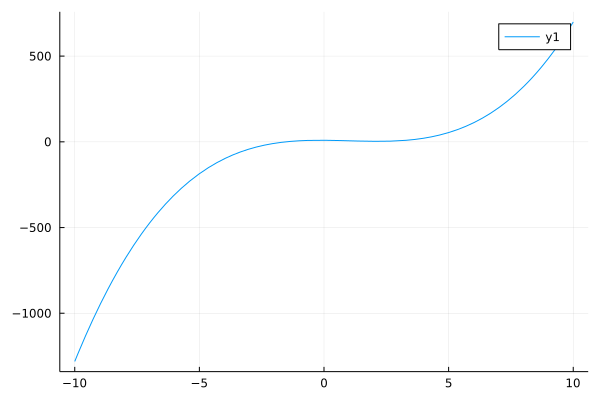

In [ ]:
f3(x) = x^3 - 3x^2 - x + 9
df3(x) = 3x^2 - 6x - 1
plot(f3, -10, 10)

In [ ]:
@time println("x = $(NewtonMethod(f3,df3,10,1e-6))")

iter             x_i+1               x_i                 ϵ                ϵ0
   0    7.075313807531   10.000000000000    2.924686192469    0.000001000000
   1    5.145786812105    7.075313807531    1.929526995426    0.000001000000
   2    3.870147832167    5.145786812105    1.275638979938    0.000001000000
   3    2.993271019726    3.870147832167    0.876876812441    0.000001000000
   4    2.242399933168    2.993271019726    0.750871086558    0.000001000000
   5   -2.432157466361    2.242399933168    4.674557399529    0.000001000000
   6   -1.771603637099   -2.432157466361    0.660553829262    0.000001000000
   7   -1.550843649819   -1.771603637099    0.220759987280    0.000001000000
   8   -1.525427868561   -1.550843649819    0.025415781258    0.000001000000
   9   -1.525102307891   -1.525427868561    0.000325560670    0.000001000000
  10   -1.525102254814   -1.525102307891    0.000000053077    0.000001000000
x = -1.5251022548143218
  0.318721 seconds (756.83 k allocations: 38.988 MiB

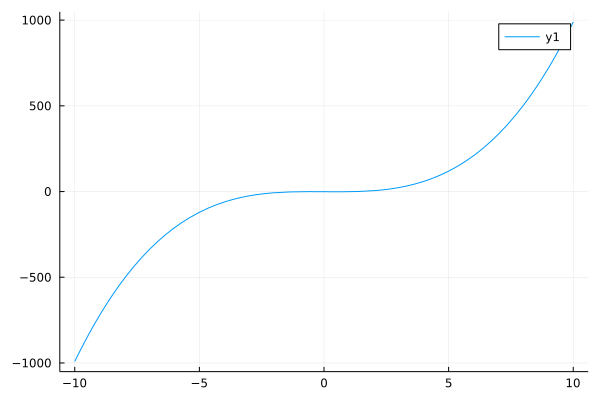

In [ ]:
f4(x) = x^3 - x - 1
df4(x) = 3x^2 - 1
plot(f4,-10,10)

In [ ]:
@time println("x = $(NewtonMethod(f4,df4,1.5,1e-6))")
@time println("x = $(NewtonMethod(f4,df4,0.6,1e-6))")

iter             x_i+1               x_i                 ϵ                ϵ0
   0    1.347826086957    1.500000000000    0.152173913043    0.000001000000
   1    1.325200398951    1.347826086957    0.022625688006    0.000001000000
   2    1.324718173999    1.325200398951    0.000482224952    0.000001000000
   3    1.324717957245    1.324718173999    0.000000216754    0.000001000000
x = 1.3247179572447898
  0.000815 seconds (127 allocations: 12.734 KiB)
iter             x_i+1               x_i                 ϵ                ϵ0
   0   17.900000000000    0.600000000000   17.300000000000    0.000001000000
   1   11.946802328609   17.900000000000    5.953197671391    0.000001000000
   2    7.985520351936   11.946802328609    3.961281976673    0.000001000000
   3    5.356909314795    7.985520351936    2.628611037141    0.000001000000
   4    3.624996032946    5.356909314795    1.731913281849    0.000001000000
   5    2.505589190107    3.624996032946    1.119406842839    0.000001000000
   6

#### 简化牛顿迭代法

In [ ]:
function SimplifiedNewtonMethod(f::Function, c, x0, ϵ0)
    x = x0
    ϵ = NaN
    i = 0
    x_prev = NaN
    @printf("%4s%18s%18s%18s%18s\n", "iter","x_i+1", "x_i","ϵ","ϵ0")
    while true
        x_prev = x
        x = x - f(x) / c
        ϵ = abs(x - x_prev)
        if i % 15 == 0 || ϵ < ϵ0 
            @printf("%4d%18.12f%18.12f%18.12f%18.12f\n",i,x,x_prev,ϵ,ϵ0)
        end
        if ϵ < ϵ0 
            break
        end
        i += 1
    end
    return x
end

SimplifiedNewtonMethod (generic function with 1 method)

In [ ]:
@time SimplifiedNewtonMethod(f3,df3(10),10,1e-6)

iter             x_i+1               x_i                 ϵ                ϵ0
   0    7.075313807531   10.000000000000    2.924686192469    0.000001000000
  15    3.678788281146    3.744451191079    0.065662909933    0.000001000000
  30    3.063280653193    3.091667810918    0.028387157725    0.000001000000
  45    2.731401120738    2.749633225609    0.018232104870    0.000001000000
  60    2.494240858977    2.508460901765    0.014220042788    0.000001000000
  75    2.296078305195    2.308658042034    0.012579736839    0.000001000000
  90    2.111456981699    2.123691708252    0.012234726553    0.000001000000
 105    1.924054842590    1.936919973530    0.012865130940    0.000001000000
 120    1.719508925838    1.733983761042    0.014474835205    0.000001000000
 135    1.481670767167    1.498944540857    0.017273773690    0.000001000000
 150    1.190057335747    1.211659199566    0.021601863819    0.000001000000
 165    0.819670208618    0.847315310207    0.027645101589    0.000001000000

-1.5250876653232968

#### 牛顿下山法

In [ ]:
function SelectDownHillFactor(f::Function, df::Function, x, λ)
    λ = 1
    x_upd = x - λ * f(x) / df(x)
    while abs(f(x_upd)) >= abs(f(x)) && λ > 1e-3
        λ /= 2
        x_upd = x - λ * f(x) / df(x)
    end
    return x_upd, λ
end
function NewtonDownHillMethod(f::Function, df::Function, x0, ϵ0)
    x = x0
    ϵ = NaN
    i = 0
    x_prev = NaN
    λ = 1
    @printf("%4s%18s%18s%18s%18s%18s\n", "iter","x_i+1", "x_i","ϵ","ϵ0","λ")
    while true
        x_prev = x
        # x = x - f(x) / df(x)
        # 个人感觉，下山法的正确性不能得到保证，是一种纯直觉的做法，然后在实践中应用效果好，所以得到了使用，或者说，这个做法推广了牛顿法，让不收敛的情况减少了
        x, λ = SelectDownHillFactor(f, df, x, λ)
        # x = x - λ * f(x) / df(x)
        ϵ = abs(x - x_prev)
        @printf("%4d%18.12f%18.12f%18.12f%18.12f%18.12f\n", i, x, x_prev, ϵ, ϵ0, λ)
        if ϵ < ϵ0
            break
        end
        i += 1
    end
    return x
end

NewtonDownHillMethod (generic function with 1 method)

In [ ]:
# 下山法并不是只需要调整几次初值，但在局部的情况，比牛顿法直接算迭代次数更少，这是一个需要取舍的问题，以及，需要有预先对函数根的位置进行估计
# Todo: 编写粗略计算根的位置的代码，计算区间，计算大致点
@time println("x = $(NewtonDownHillMethod(f3,df3,0,1e-6))")
@time println("x = $(NewtonMethod(f3,df3,0,1e-6))")

iter             x_i+1               x_i                 ϵ                ϵ0                 λ
   0    2.250000000000    0.000000000000    2.250000000000    0.000001000000    0.250000000000
   1    2.115767045455    2.250000000000    0.134232954545    0.000001000000    0.031250000000
   2    2.158866623319    2.115767045455    0.043099577865    0.000001000000    0.003906250000
   3    2.060220706408    2.158866623319    0.098645916912    0.000001000000    0.000976562500
   4    2.207107420461    2.060220706408    0.146886714053    0.000001000000    0.031250000000
   5    2.145452014199    2.207107420461    0.061655406262    0.000001000000    0.007812500000
   6    2.190150751577    2.145452014199    0.044698737378    0.000001000000    0.000976562500
   7    2.144330267761    2.190150751577    0.045820483815    0.000001000000    0.003906250000
   8    2.184214454248    2.144330267761    0.039884186487    0.000001000000    0.000976562500
   9   -1.345433122578    2.184214454248    3.5296

In [ ]:
@time println("x = $(NewtonDownHillMethod(f4,df4,1.5,1e-6))")
@time println("x = $(NewtonDownHillMethod(f4,df4,0.6,1e-6))")

iter             x_i+1               x_i                 ϵ                ϵ0                 λ
   0    1.347826086957    1.500000000000    0.152173913043    0.000001000000    1.000000000000
   1    1.325200398951    1.347826086957    0.022625688006    0.000001000000    1.000000000000
   2    1.324718173999    1.325200398951    0.000482224952    0.000001000000    1.000000000000
   3    1.324717957245    1.324718173999    0.000000216754    0.000001000000    1.000000000000
x = 1.3247179572447898
  0.119407 seconds (821.86 k allocations: 43.048 MiB, 99.56% compilation time)
iter             x_i+1               x_i                 ϵ                ϵ0                 λ
   0    1.140625000000    0.600000000000    0.540625000000    0.000001000000    0.031250000000
   1    1.366813661593    1.140625000000    0.226188661593    0.000001000000    1.000000000000
   2    1.326279804008    1.366813661593    0.040533857584    0.000001000000    1.000000000000
   3    1.324720225636    1.326279804008   

### 割线法

### 重根迭代法

#### 牛顿法修正（已知重数r）

#### 牛顿法修正（未知重数r）

In [ ]:
function NewtonMethod(f::Function, df::Function, x0, ϵ0, r)
    x = x0
    ϵ = NaN
    i = 0
    x_prev = NaN
    # λ = 1
    @printf("%4s%18s%18s%18s%18s\n", "iter","x_i+1", "x_i","ϵ","ϵ0")
    while true
        x_prev = x
        x = x - r * f(x) / df(x)
        ϵ = abs(x - x_prev)
        @printf("%4d%18.12f%18.12f%18.12f%18.12f\n", i, x, x_prev, ϵ, ϵ0)
        if ϵ < ϵ0
            break
        end
        i += 1
    end
    return x
end

NewtonMethod (generic function with 2 methods)

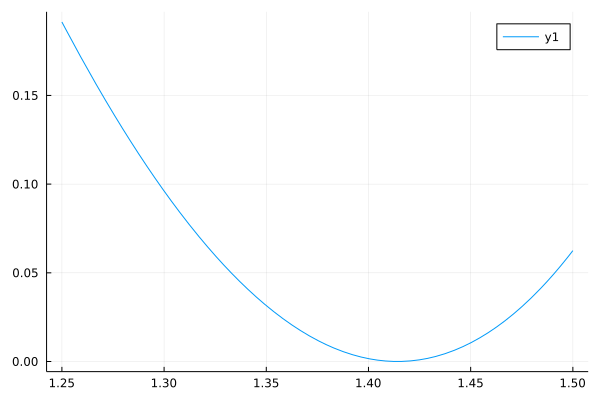

In [ ]:
# println("x = $(NewtonDownHillMethod(f3,df3,0,1e-6))")
# println("x = $(NewtonMethod(f3,df3,0,1e-6))")
f5(x) = x^4 - 4x^2 + 4
df5(x) = 4x^3 - 8x
# plot(f5, -2, -1)
plot(f5, 1.25, 1.5)

In [ ]:
@time println("x = $(NewtonDownHillMethod(f5,df5,1.5,1e-11))")

iter             x_i+1               x_i                 ϵ                ϵ0                 λ
   0    1.458333333333    1.500000000000    0.041666666667    0.000000000010    1.000000000000
   1    1.436607142857    1.458333333333    0.021726190476    0.000000000010    1.000000000000
   2    1.425497619418    1.436607142857    0.011109523440    0.000000000010    1.000000000000
   3    1.419877921684    1.425497619418    0.005619697734    0.000000000010    1.000000000000
   4    1.417051391276    1.419877921684    0.002826530408    0.000000000010    1.000000000000
   5    1.415633897604    1.417051391276    0.001417493671    0.000000000010    1.000000000000
   6    1.414924086252    1.415633897604    0.000709811353    0.000000000010    1.000000000000
   7    1.414568913512    1.414924086252    0.000355172739    0.000000000010    1.000000000000
   8    1.414391260260    1.414568913512    0.000177653253    0.000000000010    1.000000000000
   9    1.414302416898    1.414391260260    0.0000

In [ ]:
@time println("x = $(NewtonMethod(f5,df5,1.5,1e-11))")

iter             x_i+1               x_i                 ϵ                ϵ0
   0    1.458333333333    1.500000000000    0.041666666667    0.000000000010
   1    1.436607142857    1.458333333333    0.021726190476    0.000000000010
   2    1.425497619418    1.436607142857    0.011109523440    0.000000000010
   3    1.419877921684    1.425497619418    0.005619697734    0.000000000010
   4    1.417051391276    1.419877921684    0.002826530408    0.000000000010
   5    1.415633897604    1.417051391276    0.001417493671    0.000000000010
   6    1.414924086252    1.415633897604    0.000709811353    0.000000000010
   7    1.414568913512    1.414924086252    0.000355172739    0.000000000010
   8    1.414391260260    1.414568913512    0.000177653253    0.000000000010
   9    1.414302416898    1.414391260260    0.000088843362    0.000000000010
  10    1.414257991031    1.414302416898    0.000044425867    0.000000000010
  11    1.414235777051    1.414257991031    0.000022213980    0.000000000010

In [ ]:
@time println("x = $(NewtonMethod(f5,df5,1.5,1e-11,2))")

iter             x_i+1               x_i                 ϵ                ϵ0
   0    1.416666666667    1.500000000000    0.083333333333    0.000000000010
   1    1.414215686274    1.416666666667    0.002450980392    0.000000000010
   2    1.414213562435    1.414215686274    0.000002123840    0.000000000010
   3    1.414215360669    1.414213562435    0.000001798234    0.000000000010
   4    1.414213562383    1.414215360669    0.000001798286    0.000000000010
   5    1.414224726462    1.414213562383    0.000011164078    0.000000000010
   6    1.414213562427    1.414224726462    0.000011164035    0.000000000010
   7    1.414213562427    1.414213562427    0.000000000000    0.000000000010
x = 1.4142135624269483
  0.000709 seconds (214 allocations: 21.906 KiB)


### 使用 Julia 包求非线性方程数值解

> [Julia Discourse](https://discourse.julialang.org/)
>
> [How to solve two symbolic nonlinear equations in Julia?](https://discourse.julialang.org/t/how-to-solve-two-symbolic-nonlinear-equations-in-julia/11916)
>
> [How to learn how to solve equations in Julia 1.0?](https://discourse.julialang.org/t/how-to-learn-how-to-solve-equations-in-julia-1-0/15738)
>
> [Juliahub - Solvers](https://docs.juliahub.com/SymPy/KzewI/1.0.28/Tutorial/solvers/)

#### 在给定范围求解含根区间
